<a href="https://colab.research.google.com/github/palswayam5/Review_classifier_aries/blob/master/review_classsifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('amazon_reviews.csv')
df2 = pd.read_csv('Dataset-SA.csv')

In [26]:
df1.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [27]:
df1_train = df1.drop(['reviewerName','reviewTime','day_diff','helpful_yes','helpful_no','total_vote','score_pos_neg_diff','score_average_rating','wilson_lower_bound'],axis = 1)

In [28]:
df1_train.head()

,Unnamed: 0,overall,reviewText
0,0,4.0,No issues.
1,1,5.0,"Purchased this for my device, it worked as adv..."
2,2,4.0,it works as expected. I should have sprung for...
3,3,5.0,This think has worked out great.Had a diff. br...
4,4,5.0,"Bought it with Retail Packaging, arrived legit..."


In [29]:
df1_train['overall'].value_counts()

5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

In [30]:
arr = []
for i in df1_train['overall']:
  if i<3:
    arr.append(-1)
  else:
    arr.append(1)

In [31]:
print(arr)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1,

In [32]:
arr = np.array(arr)
arr.shape

(4915,)

In [33]:
arr = arr.reshape(-1,1)
arr.shape

(4915, 1)

In [34]:
df1_train['review_type'] = arr
df1_train.head()

,Unnamed: 0,overall,reviewText,review_type
0,0,4.0,No issues.,1
1,1,5.0,"Purchased this for my device, it worked as adv...",1
2,2,4.0,it works as expected. I should have sprung for...,1
3,3,5.0,This think has worked out great.Had a diff. br...,1
4,4,5.0,"Bought it with Retail Packaging, arrived legit...",1


In [35]:
df1_train.drop(['overall'],axis = 1,inplace = True)
df1_train.head()

,Unnamed: 0,reviewText,review_type
0,0,No issues.,1
1,1,"Purchased this for my device, it worked as adv...",1
2,2,it works as expected. I should have sprung for...,1
3,3,This think has worked out great.Had a diff. br...,1
4,4,"Bought it with Retail Packaging, arrived legit...",1


In [36]:
df1_train.drop(['Unnamed: 0'],axis = 1,inplace = True)

In [37]:
df1_train.head()

,reviewText,review_type
0,No issues.,1
1,"Purchased this for my device, it worked as adv...",1
2,it works as expected. I should have sprung for...,1
3,This think has worked out great.Had a diff. br...,1
4,"Bought it with Retail Packaging, arrived legit...",1


In [41]:
df1_train['review_type'].isnull().sum()

0

hence no null values in the data

In [43]:
df1_train['review_type'].value_counts()

 1    4591
-1     324
Name: review_type, dtype: int64

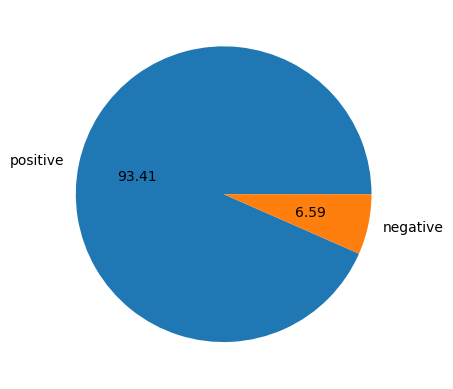

In [42]:
import matplotlib.pyplot as plt
plt.pie(df1_train['review_type'].value_counts(),labels = ['positive','negative'],autopct="%0.2f")
plt.show()

Highly skewed data
hence need to add some negative reviews to balance the data

In [44]:
df2.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [45]:
df2.drop(['product_name','product_price'],inplace = True, axis = 1)
df2.head()

,Rate,Review,Summary,Sentiment
0,5,super!,great cooler excellent air flow and for this p...,positive
1,5,awesome,best budget 2 fit cooler nice cooling,positive
2,3,fair,the quality is good but the power of air is de...,positive
3,1,useless product,very bad product its a only a fan,negative
4,3,fair,ok ok product,neutral


In [47]:
df2['Review'].value_counts()

wonderful                                     9016
not specified                                 8351
brilliant                                     5643
awesome                                       5636
great product                                 5622
                                              ... 
nice to see this product in very less rate       1
best deal in market !!                           1
amazing good for its price                       1
amazing product for its price!!!                 1
product looking very nice & strong quality       1
Name: Review, Length: 1324, dtype: int64

In [48]:
df2.drop('Review',inplace = True,axis = 1)

In [49]:
df2.head()

,Rate,Summary,Sentiment
0,5,great cooler excellent air flow and for this p...,positive
1,5,best budget 2 fit cooler nice cooling,positive
2,3,the quality is good but the power of air is de...,positive
3,1,very bad product its a only a fan,negative
4,3,ok ok product,neutral


In [52]:
arr = []
for i in df2['Sentiment']:
  if i=='positive':
    arr.append(1)
  elif i=='negative':
    arr.append(-1)
  else :
    arr.append(0)
arr = np.array(arr)
arr.reshape(-1,1)
df2['Sentiment'] = arr

In [53]:
df2.head()

,Rate,Summary,Sentiment
0,5,great cooler excellent air flow and for this p...,1
1,5,best budget 2 fit cooler nice cooling,1
2,3,the quality is good but the power of air is de...,1
3,1,very bad product its a only a fan,-1
4,3,ok ok product,0


In [59]:
df2['Sentiment'].value_counts()

 1    166581
-1     28232
 0     10239
Name: Sentiment, dtype: int64